# Reward Dependent Corticostriatal Connectivity a Meta analysis

## Import Libraries from nimare (mostly)

In [1]:
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nilearn import plotting

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE

from nilearn import image
from nimare.meta.cbma import ALESubtraction




ale = ALE(null_method="approximate")
corr = FWECorrector(method="montecarlo", voxel_thresh=0.01, n_iters=100, n_cores=4)


ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


## Characterize Datasets to See What Contrasts Can Be Run.

In [2]:
STR_seed_file="SluethFiles/STR/Str_seed.txt"
STR_seed_dset=convert_sleuth_to_dataset(STR_seed_file)
STR_cons_file="SluethFiles/STR/STR_Cons.txt"
STR_cons_dset=convert_sleuth_to_dataset(STR_cons_file)
STR_ant_file="SluethFiles/STR/STR_ant.txt"
STR_ant_dset=convert_sleuth_to_dataset(STR_ant_file)
STR_value_file="SluethFiles/STR/Str_Value.txt"
STR_value_dset=convert_sleuth_to_dataset(STR_value_file)
STR_learn_file="SluethFiles/STR/Str_Learn.txt"
STR_learn_dset=convert_sleuth_to_dataset(STR_learn_file)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
PFC_seed_file="SluethFiles/PFC/PFC_Seed.txt"
PFC_seed_dset=convert_sleuth_to_dataset(PFC_seed_file)
PFC_cons_file="SluethFiles/PFC/PFC_cons.txt"
PFC_cons_dset=convert_sleuth_to_dataset(PFC_cons_file)
PFC_ant_file="SluethFiles/PFC/PFC_ant.txt"
PFC_ant_dset=convert_sleuth_to_dataset(PFC_ant_file)
PFC_value_file="SluethFiles/PFC/PFC_Value.txt"
PFC_value_dset=convert_sleuth_to_dataset(PFC_value_file)
PFC_learn_file="SluethFiles/PFC/PFC_Learn.txt"
PFC_learn_dset=convert_sleuth_to_dataset(PFC_learn_file)


In [4]:
import pandas as pd
data=[]
for meta in [STR_seed_dset,STR_cons_dset,STR_ant_dset,STR_value_dset,STR_learn_dset]:
    data.append([len(meta.metadata['sample_sizes']),np.sum(np.sum(meta.metadata['sample_sizes'])),meta])
STR_meta=pd.DataFrame(columns=['N Studies','Total Sample',"Dset"],data=data)
STR_meta['Seed']='Striatum'
STR_meta['Construct']=['Seed','Consumption','Anticipation','Valuation','Learning']
STR_meta=STR_meta[['Seed','Construct','N Studies', 'Total Sample','Dset']]

data=[]
for meta in [PFC_seed_dset,PFC_cons_dset,PFC_ant_dset,PFC_value_dset,PFC_learn_dset]:
    data.append([len(meta.metadata['sample_sizes']),np.sum(np.sum(meta.metadata['sample_sizes'])),meta])
PFC_meta=pd.DataFrame(columns=['N Studies','Total Sample','Dset'],data=data)
PFC_meta['Seed']='PFC'
PFC_meta['Construct']=['Seed','Consumption','Anticipation','Valuation','Learning']
PFC_meta=PFC_meta[['Seed','Construct','N Studies', 'Total Sample','Dset']]

meta_df=pd.concat([STR_meta,PFC_meta])
display(meta_df)

display(meta_df[meta_df['Construct'].isin(
    ['Consumption','Anticipation','Valuation','Learning'])].groupby(by='Seed').sum())
display(meta_df[meta_df['Construct'].isin(
    ['Consumption','Anticipation','Valuation','Learning'])].groupby(by='Construct').sum())

,Seed,Construct,N Studies,Total Sample,Dset
0,Striatum,Seed,26,2513,"Dataset(26 experiments, space='ale_2mm')"
1,Striatum,Consumption,11,427,"Dataset(11 experiments, space='ale_2mm')"
2,Striatum,Anticipation,9,1890,"Dataset(9 experiments, space='ale_2mm')"
3,Striatum,Valuation,10,298,"Dataset(10 experiments, space='ale_2mm')"
4,Striatum,Learning,9,1973,"Dataset(9 experiments, space='ale_2mm')"
0,PFC,Seed,18,1909,"Dataset(18 experiments, space='ale_2mm')"
1,PFC,Consumption,7,1651,"Dataset(7 experiments, space='ale_2mm')"
2,PFC,Anticipation,1,20,"Dataset(1 experiments, space='ale_2mm')"
3,PFC,Valuation,13,324,"Dataset(13 experiments, space='ale_2mm')"
4,PFC,Learning,6,119,"Dataset(6 experiments, space='ale_2mm')"


,N Studies,Total Sample
Seed,,
PFC,27,2114
Striatum,39,4588


,N Studies,Total Sample
Construct,,
Anticipation,10,1910
Consumption,18,2078
Learning,15,2092
Valuation,23,622


# Characterize Meta Seeds
1. Fit ALE
2. Correct for Comparisons
3. Identify number of clusters and contributions

In [2]:
meta_df[(meta_df['Seed']=='Striatum')&(meta_df['Construct']=='Seed')]['Dset'][0]

NameError: name 'meta_df' is not defined

In [3]:

STR_seed = ale.fit(meta_df[(meta_df['Seed']=='Striatum')&(meta_df['Construct']=='Seed')]['Dset'][0])
PFC_seed = ale.fit(meta_df[(meta_df['Seed']=='PFC')&(meta_df['Construct']=='Seed')]['Dset'][0])


STR_seed_corr = corr.transform(STR_seed)
PFC_seed_corr = corr.transform(PFC_seed)




NameError: name 'meta_df' is not defined

## Number of clusters and Center Of Mass for each seed

,1
Cluster ID,
Center of Mass,"(-1, 12, -4)"
"Liu ,2018-VS- Consumption",0.0486201
"Reference= MNI (from TAL) Kim ,2018-VS- Learning",0.0567185
"Reference= MNI (from Tal) Holst ,2014-VS- Consumption",0.0620958
"Reference= MNI Bolstad ,2013-L_VS- anticipation",0.0293359
"Reference= MNI Bossong ,2018-VS-anticipation",0.0292867
"Reference= MNI Camara ,2008-Nacc-consumption",0.0277419
"Reference= MNI Cao ,2019-VS- anticipation learn",0.0468544
"Reference= MNI Chan ,2018-VS- anticipation Nacc",0.0231038


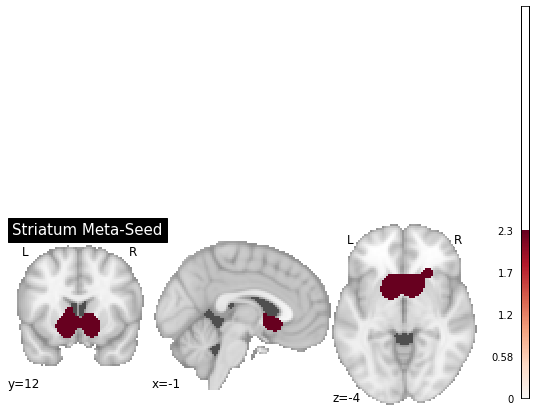

,1
Cluster ID,
Center of Mass,"(1, 40, -6)"
Kim- 2018-mpfc- Learning,0
Reference= MNI Behan- 2015-LIFG- ant+cons,0
Reference= MNI Cao- 2019-vmpfc- consumption,0.105318
Reference= MNI Deikof- 2012-vmpfc- learning,0.066712
Reference= MNI Dore- 2016-vmpfc- consumption,0.0780359
Reference= MNI Erdeniz- 2019-vmpfc-dlpfc- learning,0.0629336
Reference= MNI Geurts;vmPFC-valuation-,0.0706769
Reference= MNI Leong- 2018-vmpfc- Learning,0.06591


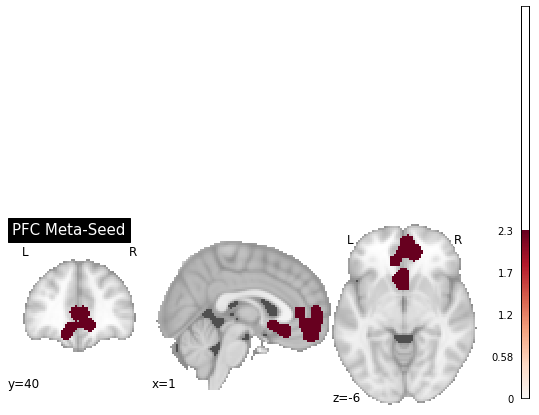

In [7]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(STR_seed_corr)
display(related_jackknife_table)

STR_img = STR_seed_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(STR_img,title="Striatum Meta-Seed",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(PFC_seed_corr)
display(related_jackknife_table)

PFC_img = PFC_seed_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(PFC_img,title="PFC Meta-Seed",cmap="RdBu_r",draw_cross=False)
plt.show()

del STR_img, PFC_img,STR_seed, STR_seed_corr,PFC_seed,PFC_seed_corr

# Striatum vs PFC targets
1. Characterize Reward-Dependent Targets
    1. Fitting the ALE and Correcting for multiple comparisons
2. Subtraction analysis
3. Conjunction analysis

In [8]:
# Merging datsets from the meta_df across seeds
constructs= ['Consumption','Anticipation','Valuation','Learning']
dset_list=meta_df[(meta_df['Seed']=='Striatum')&(meta_df['Construct'].isin(constructs))]['Dset']
print(dset_list)
STR_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    STR_dset=STR_dset.merge(dset)
display(STR_dset)

constructs= ['Consumption','Anticipation','Valuation','Learning']
dset_list=meta_df[(meta_df['Seed']=='PFC')&(meta_df['Construct'].isin(constructs))]['Dset']
print(dset_list)
PFC_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    PFC_dset=PFC_dset.merge(dset)
display(PFC_dset)

STR_t = ale.fit(STR_dset)
PFC_t = ale.fit(PFC_dset)


STR_t_corr = corr.transform(STR_t)
PFC_t_corr = corr.transform(PFC_t)

1    Dataset(11 experiments, space='ale_2mm')
2     Dataset(9 experiments, space='ale_2mm')
3    Dataset(10 experiments, space='ale_2mm')
4     Dataset(9 experiments, space='ale_2mm')
Name: Dset, dtype: object


Dataset(39 experiments, space='ale_2mm')

1     Dataset(7 experiments, space='ale_2mm')
2     Dataset(1 experiments, space='ale_2mm')
3    Dataset(13 experiments, space='ale_2mm')
4     Dataset(6 experiments, space='ale_2mm')
Name: Dset, dtype: object


Dataset(27 experiments, space='ale_2mm')

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


## Characterize Results from PFC and STR targets
### Number of clusters and relative contribution of different studies

,1,2,3,4,5,6
Cluster ID,,,,,,
Center of Mass,"(2, -16, -4)","(2, 34, 28)","(-17, 51, 1)","(-17, 9, 1)","(-24, -55, 53)","(-51, -1, 36)"
Cubillo 2019 Anticipation t-value-,6.64558e-06,0,0.110027,9.98466e-06,0.0115981,0.168032
Deikof 2012-NACC-valuation tscore,0,0,0.0447415,0,0,0
Kim 2018-VS- Learning z statistic,0,4.52628e-08,0,0,8.89371e-14,0
Liu 2018-VS- Consumption Fvalue,4.46882e-11,0.14419,0.000391911,0.0318756,0,0
Reference= MNI Bolstad 2013-L_VS- anticipation,0,0,0.000312942,0,0,0
Reference= MNI Bossong 2018-VS-anticipation tscore,5.45319e-05,0,0,0,0,0
Reference= MNI Cao 2019-VS- anticipation tscore,0.345104,1.2644e-10,0.252637,0.330621,0.196051,0.309677
Reference= MNI Cao 2019-VS- learning tscore,0.245904,0,0.121114,0.209697,0.175948,0.147446


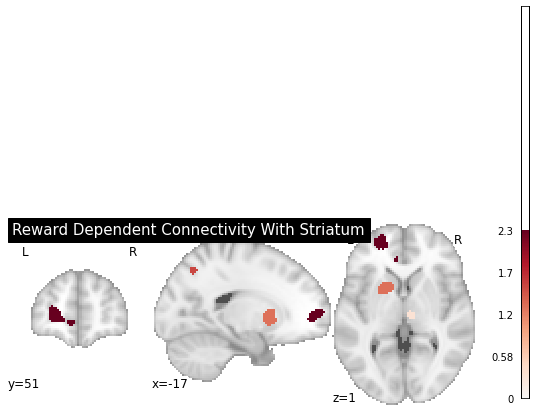

,1,2
Cluster ID,,
Center of Mass,"(29, 13, 6)","(8, 8, -4)"
Behan_ 2015-LIFG- ant,5.34202e-05,6.14034e-05
Behan_ 2015-LIFG- cons,1.1991e-07,0.0026018
Kim_ 2018-VS- Learning_z statistic,7.24027e-08,8.00826e-07
McCormick_ 2017-OFC(anat)- valuation_ tscore,0,0.134313
Reference= MNI Cao_ 2019-Vmpfc- consumption_tscore,0.333587,0.0281087
Reference= MNI Deikof_ 2012-vmpfc- learning_tscore,3.2861e-05,0.157839
Reference= MNI Dore_ 2016-vmpfc- consumption,0,0
Reference= MNI Enax_ 2015-vmpfc_ ACC; Valuation,0,0


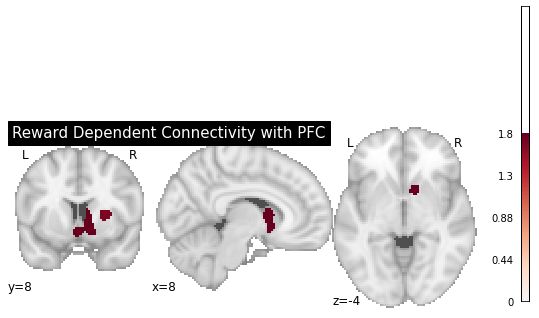

In [9]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(STR_t_corr)
display(related_jackknife_table)

STR_img = STR_t_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(STR_img,title="Reward Dependent Connectivity With Striatum",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(PFC_t_corr)
display(related_jackknife_table)

PFC_img = PFC_t_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(PFC_img,title="Reward Dependent Connectivity with PFC",cmap="RdBu_r",draw_cross=False)
plt.show()

# Subtraction analysis: STR>PFC targets

In [10]:
from nimare.meta.cbma import ALESubtraction
#Recommended way to perform subtraction see link below
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(STR_dset, PFC_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =STR_img
img2 = PFC_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)


# Conjunction analysis: STR+PFC

/home/strange/.local/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


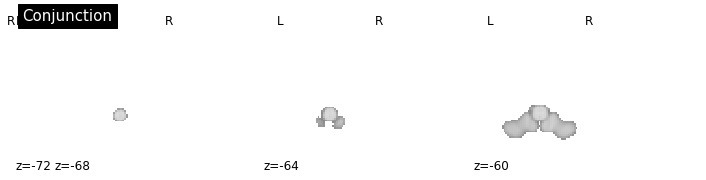

In [11]:
from nilearn.image import math_img

formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula, img1=img1, img2=img2)

plot_stat_map(
    img_conj,
    cut_coords=4,
    display_mode="z",
    title="Conjunction",
    threshold=2.326,  # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
)

# Results
1. The Striatum and PFC show differential RDC with the vmPFC (Striatum Greater)
2. Striatum and PFC do not converge on regions with similar RDC. (Striatum does highlight DS)


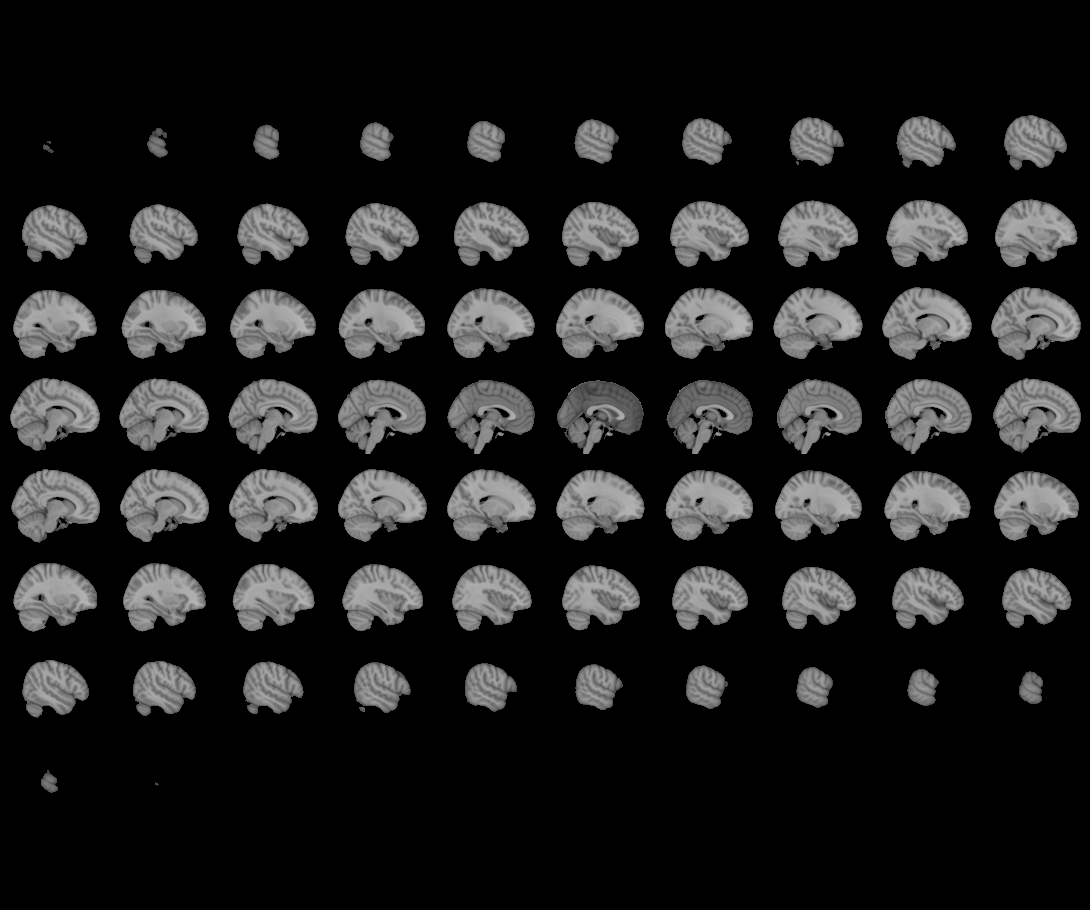
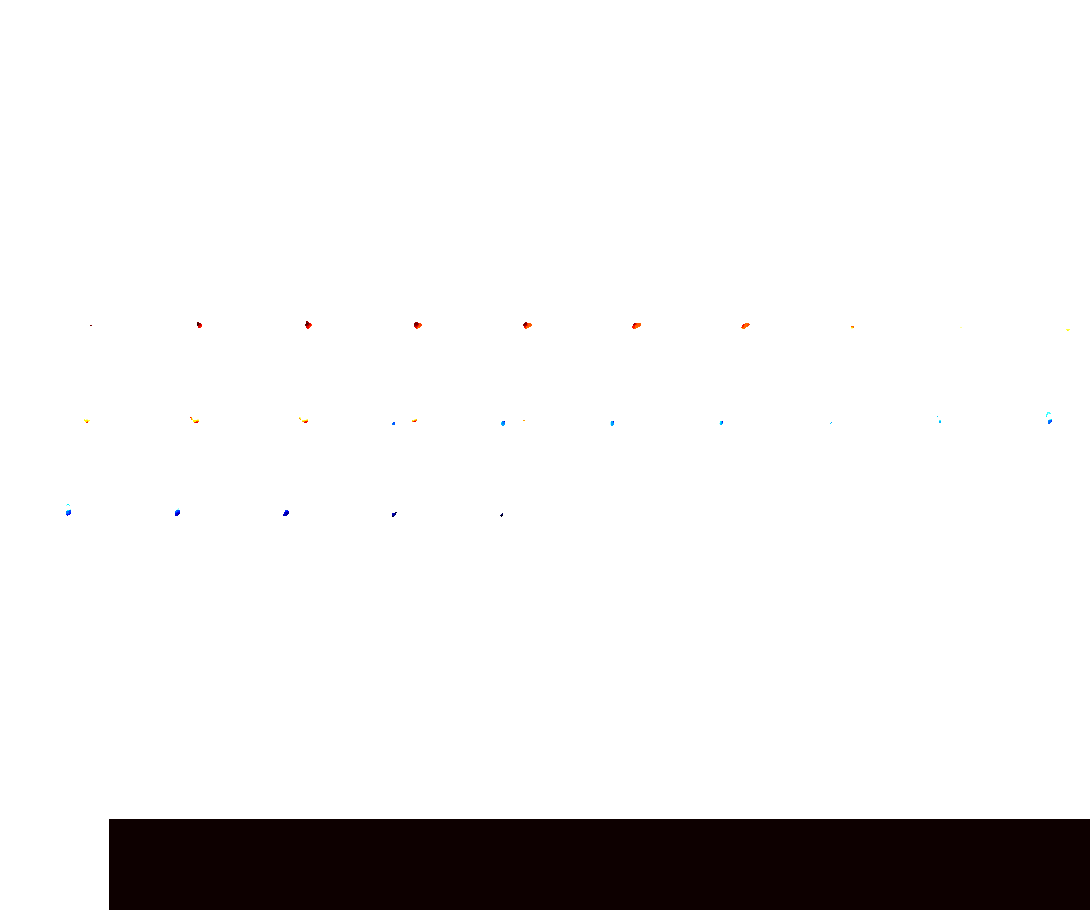

In [12]:
img_sub.to_filename('STR>PFC.nii.gz')
plotting.view_img(img_sub,title="RDC STR>PFC",draw_cross=False)


In [19]:
#deleting objects I'm done with
del img_sub,ale_mask,img1,img2,res_sub,STR_img,PFC_img,STR_t_corr,STR_t,PFC_t_corr,PFC_t
import gc
gc.collect()

NameError: name 'img_sub' is not defined

# Connectivity Dependent on Task
1. Anticipation
2. Consumption
3. Valuation
4. Learning

## Merging Datasets across seeds

In [21]:
constructs= ['Consumption','Anticipation','Valuation','Learning']

dset_list=meta_df[((meta_df['Construct']=='Anticipation'))]['Dset']
print(dset_list)
Ant_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    Ant_dset=Ant_dset.merge(dset)
display("Anticipation DSET",Ant_dset)

dset_list=meta_df[((meta_df['Construct']=='Consumption'))]['Dset']
print(dset_list)
Cons_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    Cons_dset=Cons_dset.merge(dset)
display("Consumption DSET",Cons_dset)

dset_list=meta_df[((meta_df['Construct']=='Valuation'))]['Dset']
print(dset_list)
Value_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    Value_dset=Value_dset.merge(dset)
display("Valuation Dset",Value_dset)

dset_list=meta_df[((meta_df['Construct']=='Learning'))]['Dset']
print(dset_list)
Learn_dset=dset_list.iloc[0].copy()
for dset in dset_list[1:]:
    Learn_dset=Learn_dset.merge(dset)
display("Learning DSet",Learn_dset)

2    Dataset(9 experiments, space='ale_2mm')
2    Dataset(1 experiments, space='ale_2mm')
Name: Dset, dtype: object


'Anticipation DSET'

Dataset(10 experiments, space='ale_2mm')

1    Dataset(11 experiments, space='ale_2mm')
1     Dataset(7 experiments, space='ale_2mm')
Name: Dset, dtype: object


'Consumption DSET'

Dataset(18 experiments, space='ale_2mm')

3    Dataset(10 experiments, space='ale_2mm')
3    Dataset(13 experiments, space='ale_2mm')
Name: Dset, dtype: object


'Valuation Dset'

Dataset(23 experiments, space='ale_2mm')

4    Dataset(9 experiments, space='ale_2mm')
4    Dataset(6 experiments, space='ale_2mm')
Name: Dset, dtype: object


'Learning DSet'

Dataset(15 experiments, space='ale_2mm')

## Anticipation

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2,3,4,5,6,7
Cluster ID,,,,,,,
Center of Mass,"(8, 43, -6)","(0, -16, -5)","(1, 2, 60)","(-7, 43, -2)","(-21, 56, 2)","(-26, -90, -10)","(-53, -9, 29)"
Behan_ 2015-LIFG- ant,7.21227e-05,0,0,0.000209604,0,3.23178e-06,0
Cubillo 2019 Anticipation t-value-,8.18421e-10,1.62252e-05,0,1.04202e-05,0.346749,9.51274e-06,0.344673
Reference= MNI Bolstad 2013-L_VS- anticipation,0,0,0,0.000296879,0.000581629,0,0
Reference= MNI Bossong 2018-VS-anticipation tscore,0,0.000258221,0,0,0,0.155093,0
Reference= MNI Cao 2019-VS- anticipation tscore,0.566372,0.467227,0.504906,0.283177,0.649808,0.422294,0.653129
Reference= MNI Chan 2018-VS- anticipation tstat,0.214892,0.263919,0,0.355224,0.000520887,0,0
Reference= MNI Chan 2018; Nacc-anticipation tstat-,0.216205,0.265596,0,0.358409,0.000496902,0,0
Reference= MNI Harsay 2011-DS- anticipation zscore,0,0,0.0194285,0,0,0,0



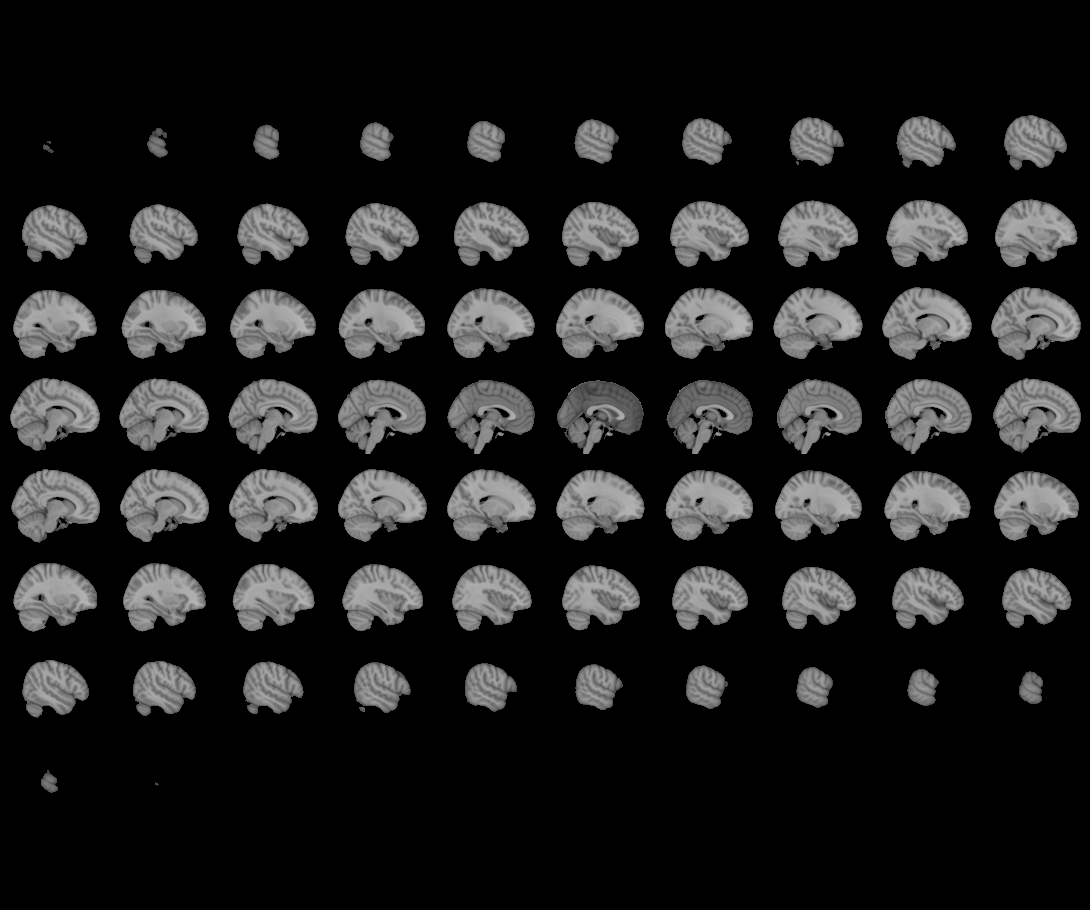
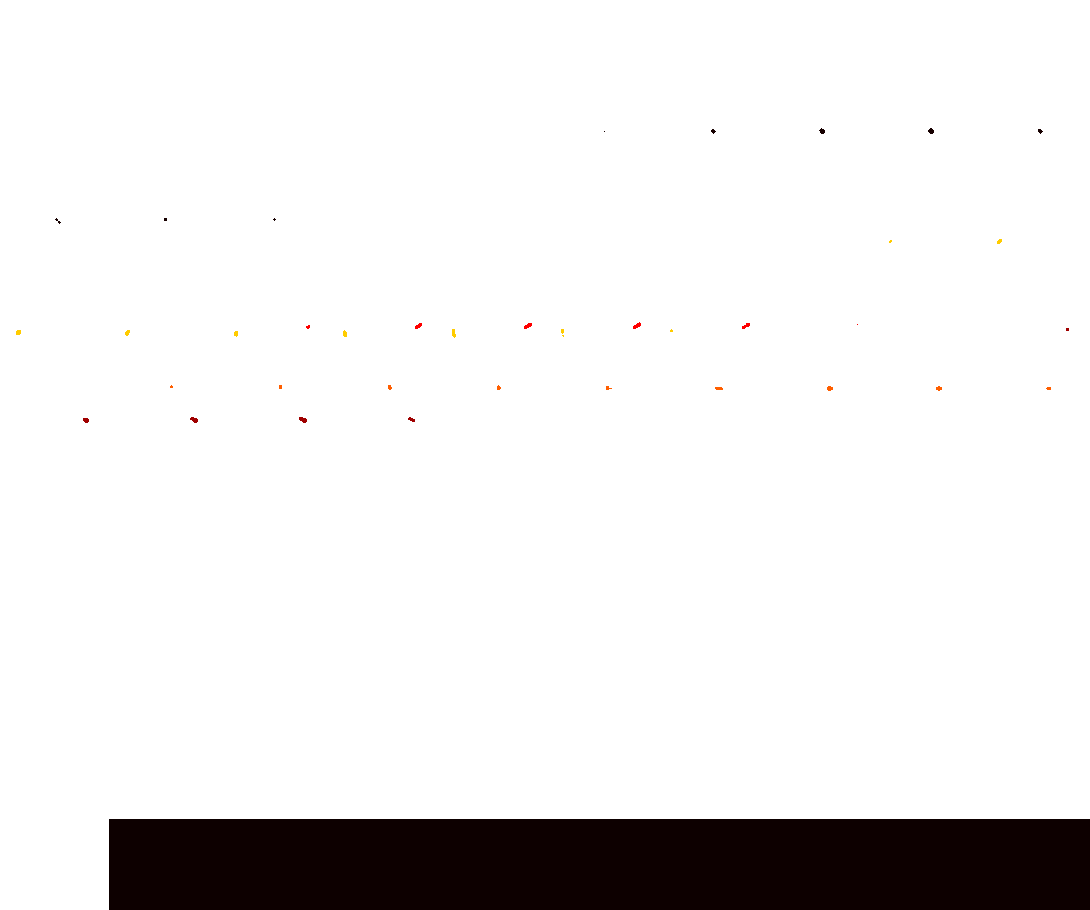

In [22]:
ANT_res = ale.fit(Ant_dset)
ANT_corr = corr.transform(ANT_res)
ANT_img = ANT_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
related_jackknife_table, _ = jackknife.transform(ANT_corr)
display(related_jackknife_table)
ANT_img.to_filename('Both_ANT.nii.gz')
plotting.view_img(ANT_img,title="RDC Both Anticipation",draw_cross=False)


In [24]:
del ANT_res,ANT_corr,ANT_img
gc.collect()

NameError: name 'ANT_res' is not defined

## Consumption


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2
Cluster ID,,
Center of Mass,"(39, -3, 51)","(7, 37, 26)"
Behan_ 2015-LIFG- cons,0.242002,0
Liu 2018-VS- Consumption Fvalue,0.175262,0.282687
Reference= MNI Cao_ 2019-Vmpfc- consumption_tscore,0.346969,1.22755e-09
Reference= MNI Chan 2018-VS- consumption tstat,0,0.323364
Reference= MNI Chan 2018; Nacc-consumption tstat-,0,0
Reference= MNI Dore_ 2016-vmpfc- consumption,0,0.0884953
Reference= MNI Holst 2014-VS- Consumption ZSCORE,0,0
Reference= MNI Huang 2019-VS- Consumption z-score,0,0.00277741



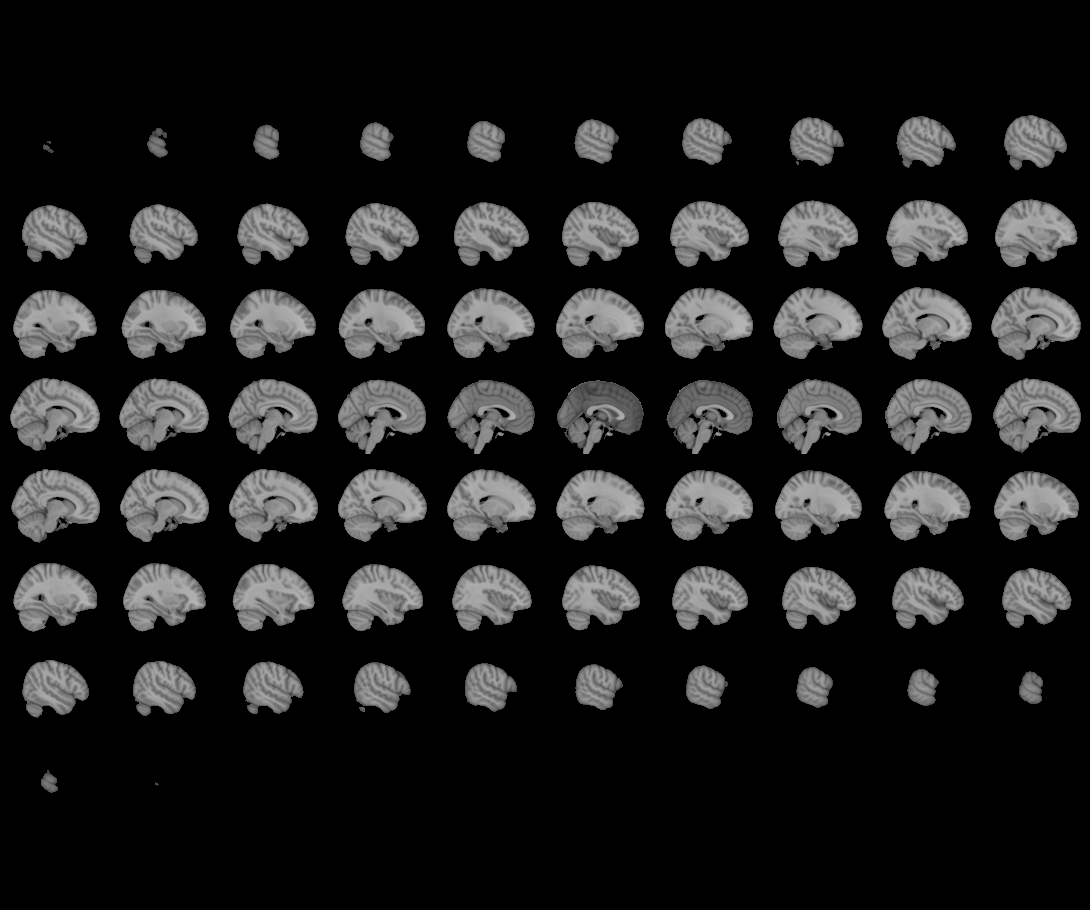
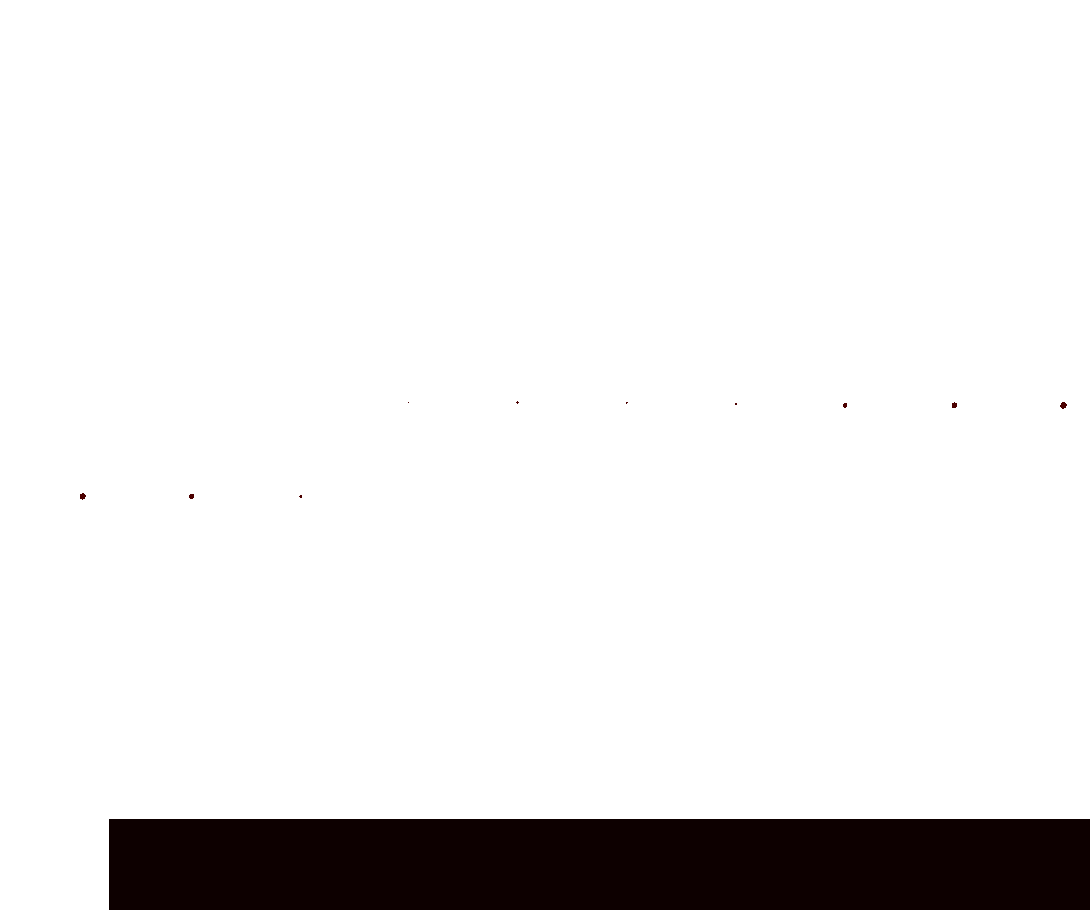

In [25]:
Cons_res = ale.fit(Cons_dset)
Cons_corr = corr.transform(Cons_res)
Cons_img = Cons_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
related_jackknife_table, _ = jackknife.transform(Cons_corr)
display(related_jackknife_table)
Cons_img.to_filename('Both_Cons.nii.gz')
plotting.view_img(Cons_img,title="RDC Both Consumption",draw_cross=False)


In [26]:
del Cons_res,Cons_corr,Cons_img
gc.collect()

## Valuation


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2,3
Cluster ID,,,
Center of Mass,"(10, -6, 3)","(-1, -46, 21)","(2, 46, -14)"
Deikof 2012-NACC-valuation tscore,0,0,0
McCormick_ 2017-OFC(anat)- valuation_ tscore,6.00178e-05,0.246037,0.300105
Reference= MNI DiFeliceantonio 2018-Valuation,0,0,0
Reference= MNI Diekhof 2010-Valuation,0,0,6.14953e-07
Reference= MNI Enax_ 2015-vmpfc_ ACC; Valuation,0,3.12612e-05,0.256886
Reference= MNI Enax_2015-vmpfc-ACC_Valuation-tstats,0,0,0.208976
Reference= MNI Geurts;vmPFC-valuation-,1.34742e-09,0,1.02239e-10
Reference= MNI Green_ 2012-dlpfc-valuation,0,0,0



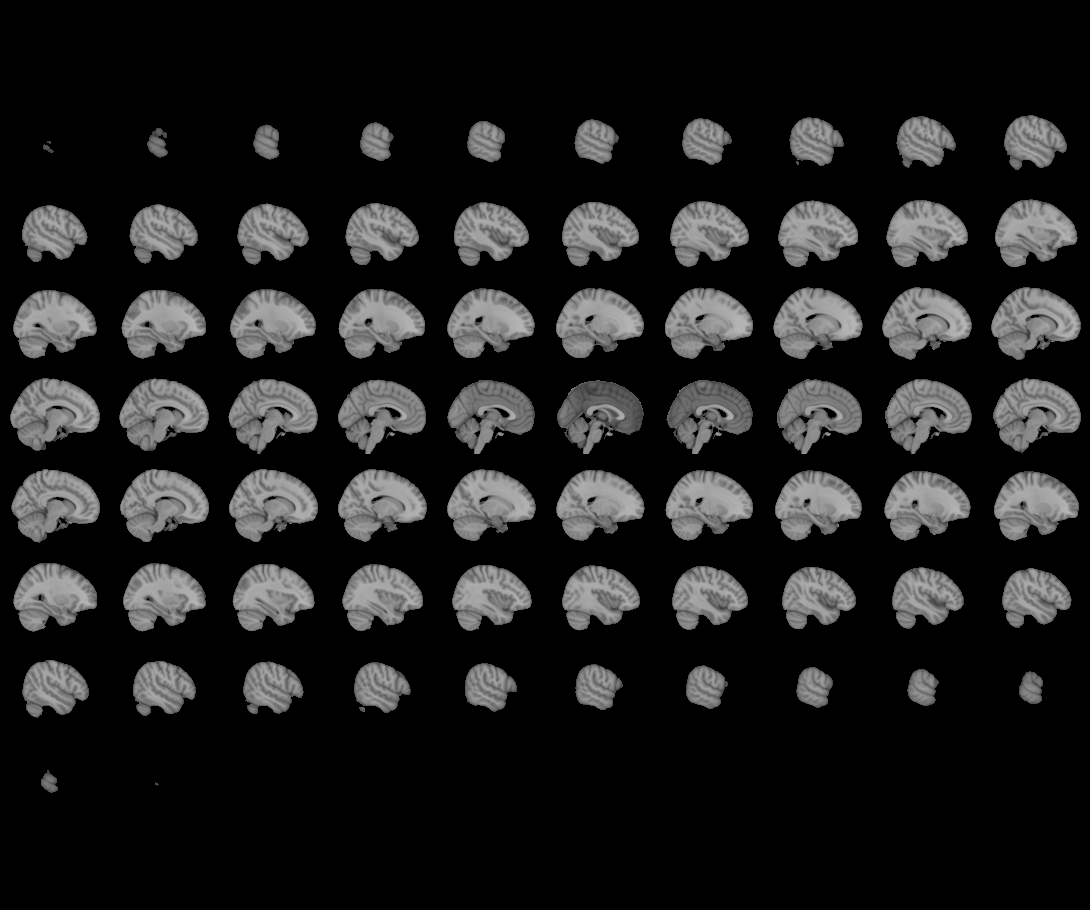
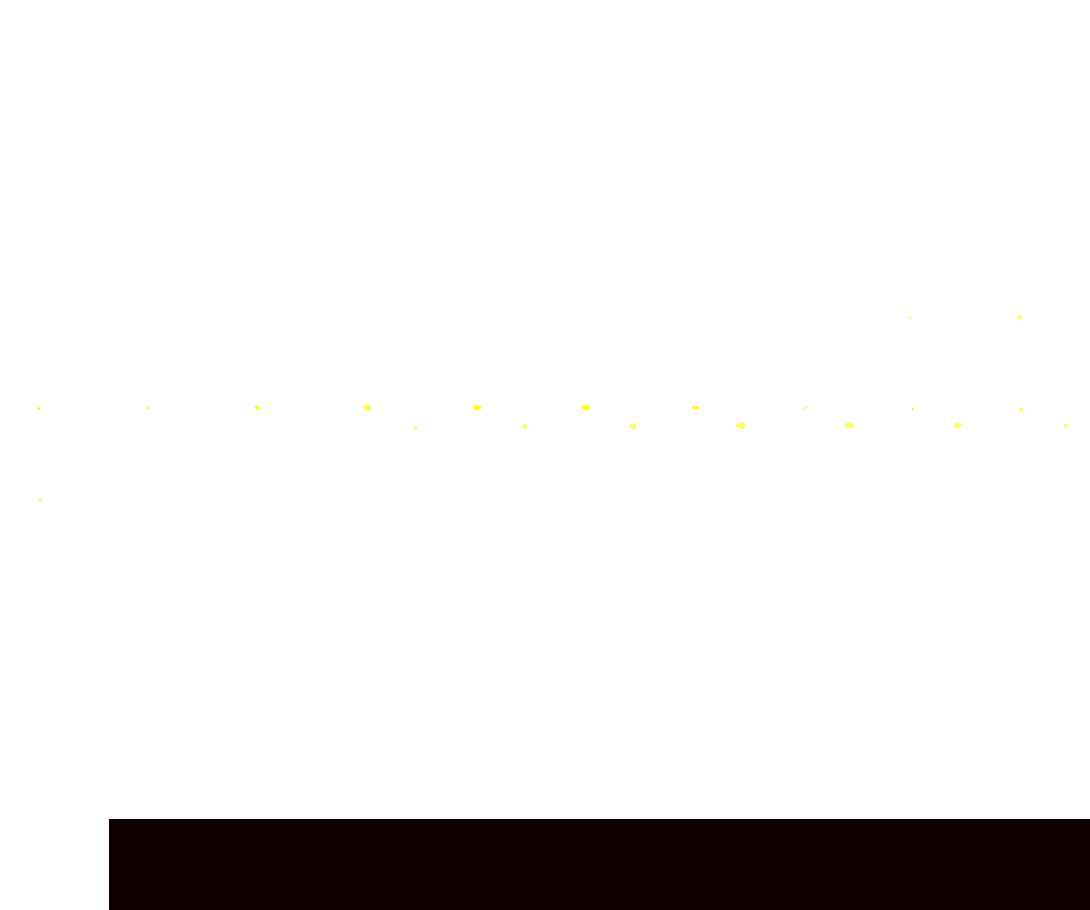

In [27]:
Val_res = ale.fit(Value_dset)
Val_corr = corr.transform(Val_res)
Val_img = Val_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
related_jackknife_table, _ = jackknife.transform(Val_corr)
display(related_jackknife_table)
Val_img.to_filename('Both_Val.nii.gz')
plotting.view_img(Val_img,title="RDC Both Valuation",draw_cross=False)


In [28]:
del Val_res,Val_corr,Val_img
gc.collect()

## Learning


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2,3
Cluster ID,,,
Center of Mass,"(38, -16, 40)","(25, 15, 10)","(-22, -60, 51)"
Kim 2018-VS- Learning z statistic,0,0,1.08306e-12
Kim_ 2018-VS- Learning_z statistic,0,0.000185587,0
Reference= MNI Cao 2019-VS- learning tscore,0.00276881,0.288975,0.172708
Reference= MNI Deikof_ 2012-vmpfc- learning_tscore,0,7.99374e-05,0
Reference= MNI Duijvenvoorde;left VS-Learning Z-,0.210259,1.82819e-07,0.211748
Reference= MNI Duijvenvoorde;right VS-Learning Z-,0.211782,1.37876e-08,0.211777
Reference= MNI Erdeniz_ 2019-vmpfc_dlpfc- learning_ tscore,0.157685,0.143072,6.56613e-08
Reference= MNI Fouragnan 2013-Caud- learning tstat,0,0,0



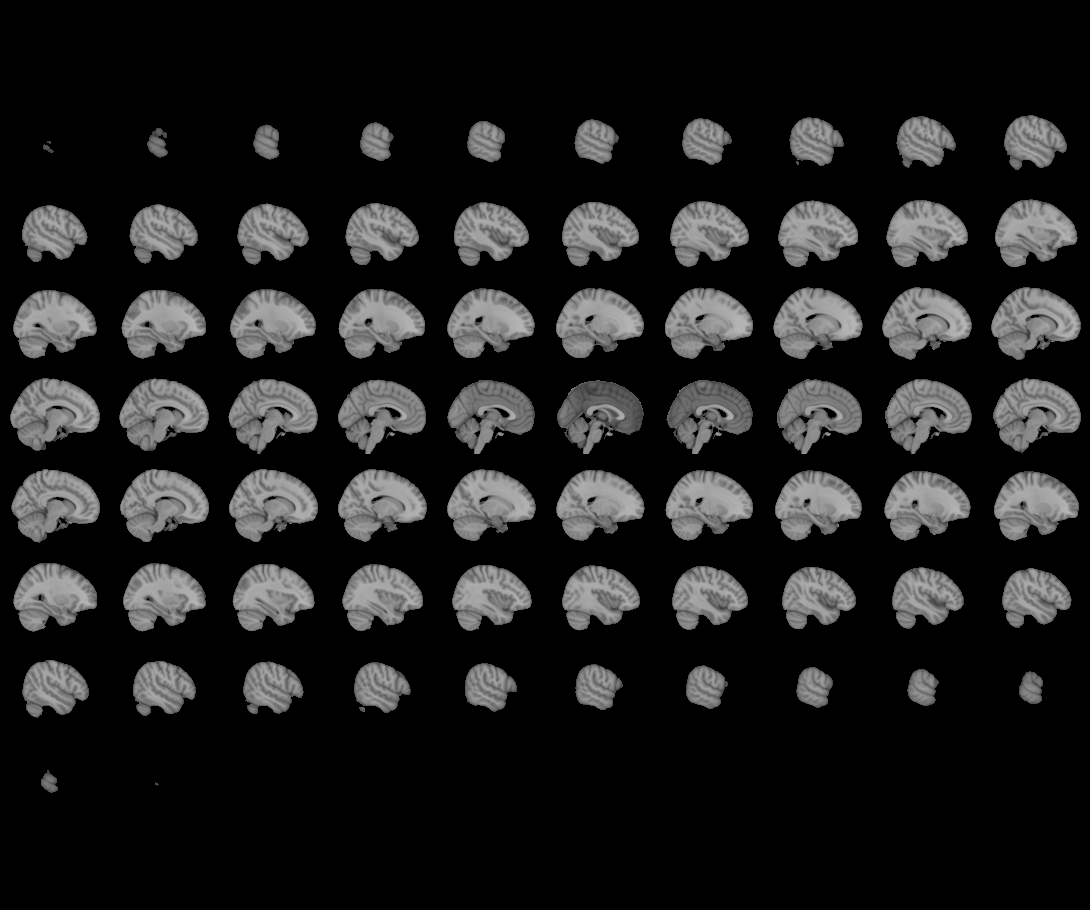
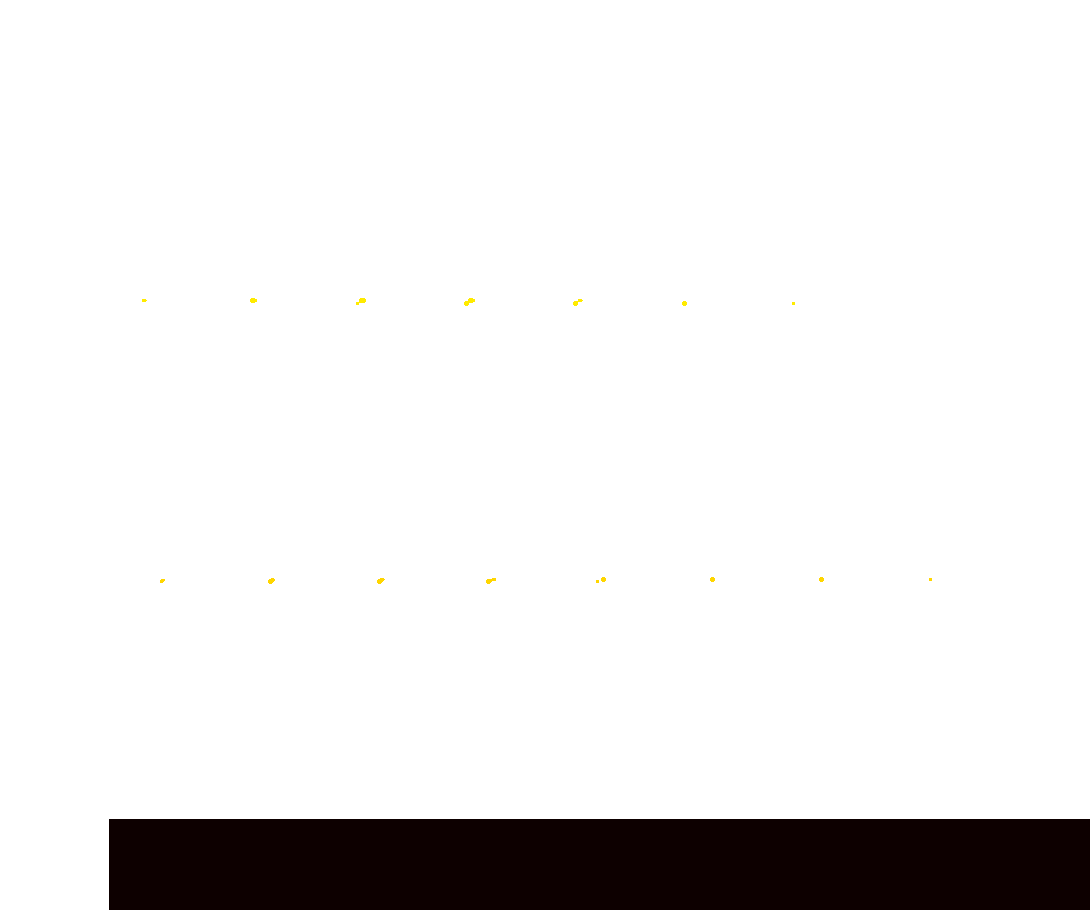

In [29]:
Learn_res = ale.fit(Learn_dset)
Learn_corr = corr.transform(Learn_res)
Learn_img = Learn_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
related_jackknife_table, _ = jackknife.transform(Learn_corr)
display(related_jackknife_table)
Learn_img.to_filename('Both_Learn.nii.gz')
plotting.view_img(Learn_img,title="RDC Both Learning",draw_cross=False)


In [28]:
del Learn_res,Learn_corr,Learn_img
gc.collect()

## Pre>Post

In [30]:
Pre_dset=Ant_dset.merge(Value_dset)
Post_dset=Cons_dset.merge(Learn_dset)

Pre_res = ale.fit(Pre_dset)
Post_res = ale.fit(Post_dset)

Pre_corr = corr.transform(Pre_res)
Post_corr = corr.transform(Post_res)


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


In [31]:
#Subtraction
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(Pre_dset, Post_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =Pre_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
img2 = Post_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

/home/strange/.local/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


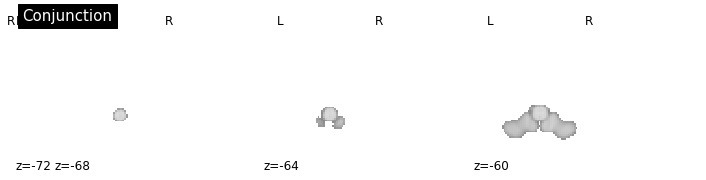

In [32]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula, img1=img1, img2=img2)

plot_stat_map(
    img_conj,
    cut_coords=4,
    display_mode="z",
    title="Conjunction",
    threshold=2.326,  # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
)



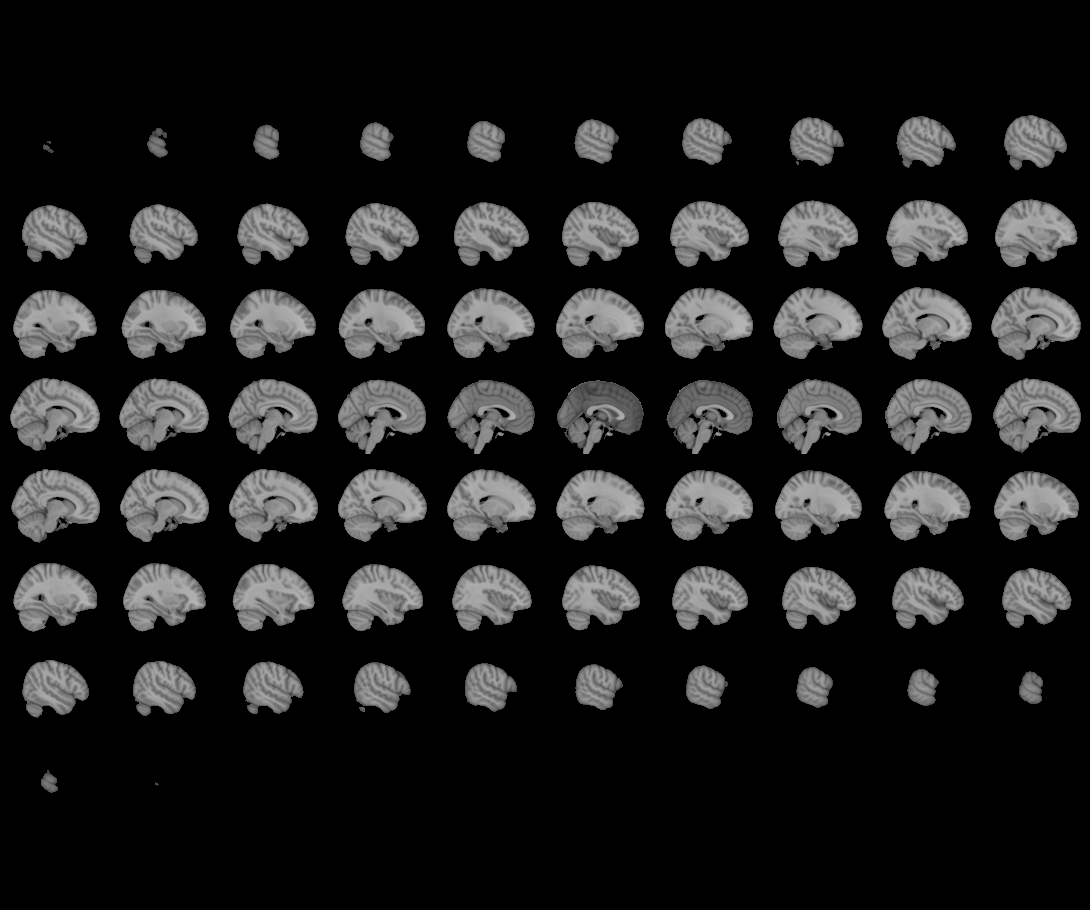
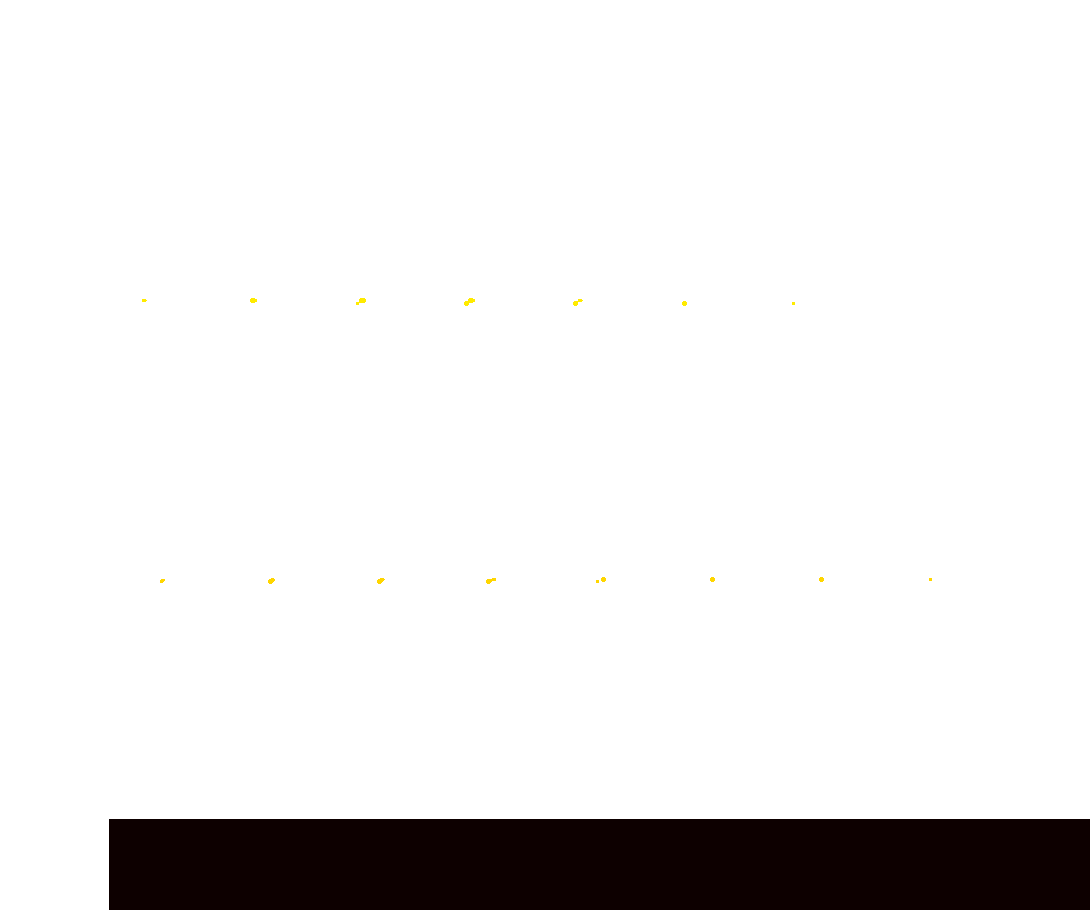

In [33]:
Learn_img.to_filename('Both_Pre>Post.nii.gz')
plotting.view_img(Learn_img,title="RDC Both Pre>Post",draw_cross=False)

In [28]:
del Pre_res,Post_res,Pre_corr,Post_corr,img_sub
gc.collect()

## Dec>NonDec

In [ ]:
Dec_dset=Ant_dset.merge(Cons_dset)
NonDec_dset=Value_dset.merge(Learn_dset)

Dec_res = ale.fit(Dec_dset)
NonDec_res = ale.fit(NonDec_dset)

Dec_corr = corr.transform(Dec_res)
NonDec_corr = corr.transform(NonDec_res)


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


In [ ]:
#Subtraction
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(Pre_dset, Post_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =Dec_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
img2 = NonDec_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

img_z_thresh, thresh_z = glm.threshold_stats_img(
        stat_img=img_z,
        alpha=voxel_thresh,
        height_control="fpr",
        cluster_threshold=k,
        two_sided=two_sided,
    )

In [ ]:
Learn_img.to_filename('Both_Dec>NonDec.nii.gz')
plotting.view_img(Learn_img,title="RDC Both Dec>NonDec",draw_cross=False)

## Dec > Non-dec


In [ ]:
img_sub.to_filename("Targets_STR>PFC.nii.gz")
STR_img.to_filename("Targets_STR.nii.gz")
PFC_img.to_filename("Targets_PFC.nii.gz")

In [ ]:
from nimare.meta.cbma import ALESubtraction
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(STR_seed_dset, PFC_seed_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =STR_img
img2 = PFC_img

# Threshold and binarize the ALE maps
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

In [ ]:
# Subtraction Analysis
plotting.view_img(img_sub,title="RDC STR>PFC",draw_cross=False)




## Striatum Reward Dependent Connectivity 
### Pre Reward Receipt (Anticipation-ish) vs Post Reward receipt (Consumption-ish)

In [ ]:
pre_file="NIMARE_OUTPUT/STR_pre.txt"
pre_dset=convert_sleuth_to_dataset(pre_file)

post_file="NIMARE_OUTPUT/STR_post.txt"
post_dset=convert_sleuth_to_dataset(post_file)


pre_res = ale.fit(pre_dset)
post_res = ale.fit(post_dset)


pre_corr = corr.transform(pre_res)
post_corr = corr.transform(post_res)

In [ ]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(pre_corr)
display(related_jackknife_table)

pre_img = pre_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(pre_img,title="Pre-Reward Connectivity",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(post_corr)
display(related_jackknife_table)

post_img = post_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(post_img,title="Post-Reward Connectivity",cmap="RdBu_r",draw_cross=False)
plt.show()

In [ ]:
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(pre_dset, post_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =pre_img
img2 = post_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

## Results
1. Striatal -> mPFC + dlPFC connectivity is enhanced by pre>post reward receipt
2. Striatal -> Precuneus connecitivity is enhanced by post>pre reward receipt

In [ ]:
plotting.view_img(img_sub,title="RDC of Striatum Pre > Post",draw_cross=False)
img_sub.to_filename('STR>PFC.nii.gz')

In [ ]:
plotting.view_img(img_conj,title="RDC of Striatum Pre > Post",draw_cross=False)
img_conj.to_filename('STR+PFC.nii.gz')

## Decision vs non-decision

In [ ]:
dec_file="NIMARE_OUTPUT/STR_dec.txt"
dec_dset=convert_sleuth_to_dataset(dec_file)

non_file="NIMARE_OUTPUT/STR_nodec.txt"
non_dset=convert_sleuth_to_dataset(non_file)


dec_res = ale.fit(dec_dset)
non_res = ale.fit(non_dset)


dec_corr = corr.transform(dec_res)
non_corr = corr.transform(non_res)

In [ ]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(dec_corr)
display(related_jackknife_table)

dec_img = dec_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(dec_img,title="Decision-Reward Connectivity",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(non_corr)
display(related_jackknife_table)

non_img = non_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(non_img,title="Non-Decision-Reward Connectivity",cmap="RdBu_r",draw_cross=False)
plt.show()

In [ ]:
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(dec_dset, non_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =dec_img
img2 = non_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

In [ ]:
pre_file="SluethFiles/Both_Pre.txt"
pre_dset=convert_sleuth_to_dataset(pre_file)

post_file="SluethFiles/Both_Post.txt"
post_dset=convert_sleuth_to_dataset(post_file)


pre_res = ale.fit(pre_dset)
post_res = ale.fit(post_dset)


pre_corr = corr.transform(pre_res)
post_corr = corr.transform(post_res)

In [ ]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(pre_corr)
display(related_jackknife_table)

pre_img = pre_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(pre_img,title="Pre-Reward Connectivity",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(post_corr)
display(related_jackknife_table)

post_img = post_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(post_img,title="Post-Reward Connectivity",cmap="RdBu_r",draw_cross=False)
plt.show()

In [ ]:
from nimare.meta.cbma import ALESubtraction

#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(pre_dset, post_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =pre_img
img2 = post_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

In [ ]:
img_sub.to_filename('Both_pre>post.nii.gz')

In [ ]:
for index, row in full_meta.iterrows():
    meta=row['Dset']
    seed=row['Seed']
    construct=row['Construct']
    print(seed,construct)
    
    meta_res=ale.fit(meta)
    meta_corr=corr.transform(meta_res)
    jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None)
    related_jackknife_table, _ = jackknife.transform(meta_corr)
    display(related_jackknife_table)

    meta_img = meta_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
    plot_stat_map(meta_img,title="%s_%s_img"%(seed,construct),cmap="RdBu_r",draw_cross=False)
    meta_img.to_filename("%s-%s_consistent.nii.gz"%(seed,construct))


    plt.show